In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

1. Построить гистограмму количества звонков в техническую поддержку

In [3]:
file = pd.read_csv('churn.csv')

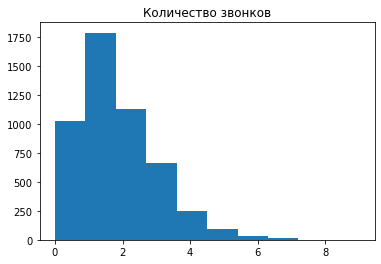

In [4]:
plt.hist(file['number_customer_service_calls'], bins=10)
plt.title('Количество звонков')
plt.show()

 2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны)

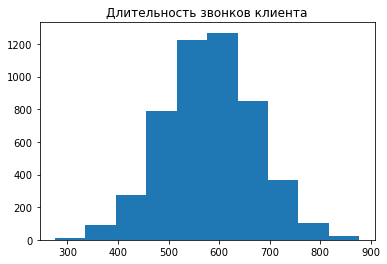

In [5]:
total_minutes = []
for i, j in enumerate(file['total_day_minutes']):
  res = file['total_eve_minutes'][i] + j + file['total_night_minutes'][i]
  total_minutes.append(res)
plt.clf()
file['total_minutes'] = total_minutes
plt.hist(total_minutes)
plt.title('Длительность звонков клиента')
plt.show()

3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку

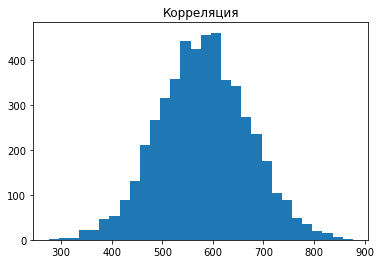

In [8]:
total_minutes = []
for i, j in enumerate(file['total_day_minutes']):
  total_minutes.append(file['total_eve_minutes'][i] + j + file['total_night_minutes'][i])
file['total_minutes'] = total_minutes
plt.hist(total_minutes, bins=30)
plt.title('Корреляция')
plt.show()

4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

<Figure size 432x288 with 0 Axes>

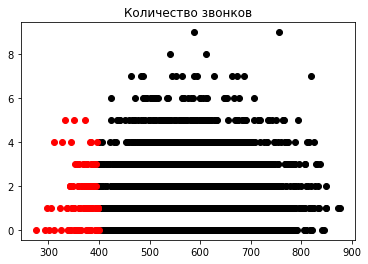

In [9]:
plt.clf()
x = []; y = []; x1 = []; y1 = []
for i, j in enumerate(file['number_customer_service_calls']):
  if j+total_minutes[i] < 400:
    x1.append(total_minutes[i])
    y1.append(j)
  else:
    x.append(total_minutes[i])
    y.append(j)
fig, ax = plt.subplots()
ax.scatter(x, y, color='black')
ax.scatter(x1, y1, color='red')
plt.title('Количество звонков')
plt.show()

5. Вывести top-5 самых много и самых мало говорящих клиентов

In [10]:
print('Самые многоговорящие клиенты:\n'+str(file.nlargest(5, 'total_minutes')))
print('\nСамые малоговорящие клиенты:\n'+str(file.nsmallest(5, 'total_minutes')))

Самые многоговорящие клиенты:
     state  account_length  area_code phone_number international_plan  \
289     OK              89        510     352-6976                 no   
985     NY              64        415     345-9140                yes   
4271    MO             103        415     370-4667                 no   
3205    MS             111        408     345-3787                 no   
4991    AZ              97        510     410-3888                 no   

     voice_mail_plan  number_vmail_messages  total_day_minutes  \
289               no                      0              303.9   
985               no                      0              346.8   
4271             yes                     37              230.7   
3205              no                      0              294.7   
4991              no                      0              252.6   

      total_day_calls  total_day_charge  ...  total_eve_charge  \
289                95             51.66  ...             22.18   
98

6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [11]:
print('Доля оттока клиентов составляет '+str((file['number_customer_service_calls'][0]+total_minutes[0])/(file['number_customer_service_calls'][4999]+total_minutes[4999])))
res = 0
for i, j in enumerate(file['total_day_minutes']):
  if file['total_day_charge'][i]:
    res = res+(file['total_day_charge'][i]/j)
res = res/(i+1)
print('Средняя стоимость минуты разговора составляет '+str(res))

Доля оттока клиентов составляет 1.2846000362778889
Средняя стоимость минуты разговора составляет 0.16993525991392774


7. Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark

In [16]:
pd.get_dummies(file, columns=["state"]).head(5)

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0


8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)

In [24]:
df = file[['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',           
    'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
    'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']]
df.head(5)

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas.

In [27]:
X, y = file[['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',           
    'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
    'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
    'total_intl_charge', 'number_customer_service_calls']], file['churned']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
X_train.head(5)

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
3221,0,153.5,94,26.10,251.7,118,21.39,182.2,99,8.20,8.5,6,2.30,1
213,31,167.6,139,28.49,113.0,118,9.61,246.9,121,11.11,12.2,6,3.29,1
1847,39,143.9,73,24.46,210.3,117,17.88,129.2,117,5.81,12.5,8,3.38,2
4264,0,278.4,121,47.33,252.2,139,21.44,202.3,96,9.10,13.7,1,3.70,1
2700,0,255.1,124,43.37,230.6,110,19.60,218.0,69,9.81,8.5,5,2.30,3


10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [31]:
y_train.head()

3221    False
213     False
1847    False
4264     True
2700     True
Name: churned, dtype: bool

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
logistic = LogisticRegression()

In [34]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [35]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
svc_model=SVC()

In [37]:
svc_model.fit(X_train, y_train)

SVC()

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
accuracy_score(y_test, logistic.predict(X_test))

0.864

In [40]:
precision_score(y_test, logistic.predict(X_test))

0.4838709677419355

In [41]:
recall_score(y_test, logistic.predict(X_test))

0.1111111111111111

In [42]:
f1_score(y_test, logistic.predict(X_test))

0.18072289156626503

In [43]:
accuracy_score(y_test, tree.predict(X_test))

0.877

In [44]:
precision_score(y_test, tree.predict(X_test))

0.541095890410959

In [45]:
recall_score(y_test, tree.predict(X_test))

0.5851851851851851

In [46]:
f1_score(y_test, tree.predict(X_test))

0.5622775800711745

In [47]:
accuracy_score(y_test, svc_model.predict(X_test))

0.918

In [48]:
precision_score(y_test, svc_model.predict(X_test))

0.9206349206349206

In [49]:
recall_score(y_test, svc_model.predict(X_test))

0.42962962962962964

In [50]:
f1_score(y_test, svc_model.predict(X_test))

0.5858585858585859